In [2]:
!pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 2.2 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.8 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...


True

In [5]:
!pip install wordcloud



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import math
from nltk import word_tokenize,sent_tokenize
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [22]:
df=pd.read_csv("C:\\Users\\prati\\Documents\\Dsbda\\Text analytics\\Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [23]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [25]:
pd.set_option('display.max_colwidth',None)
#using text column
df=df['Text']
df.head()


0                                                                                                                                                                                                                                                          I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
1                                                                                                                                                                                                                                                                                                                                   Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to repr

In [26]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
doc="This saltwater taffy had great flavors and was very soft and chewy.  Each candy was individually wrapped well.  None of the candies were stuck together, which did happen in the expensive version, Fralinger's.  Would highly recommend this candy!  I served it at a beach-themed party and everyone loved it!"

In [29]:
doc=doc.lower()
print(doc)

this saltwater taffy had great flavors and was very soft and chewy.  each candy was individually wrapped well.  none of the candies were stuck together, which did happen in the expensive version, fralinger's.  would highly recommend this candy!  i served it at a beach-themed party and everyone loved it!


In [31]:
tokens=word_tokenize(doc)   # tokenize the text
words = [w for w in tokens if w.isalpha()]  ## Keep only alphabetic words (removes punctuation and numbers)
print(words)

['this', 'saltwater', 'taffy', 'had', 'great', 'flavors', 'and', 'was', 'very', 'soft', 'and', 'chewy', 'each', 'candy', 'was', 'individually', 'wrapped', 'well', 'none', 'of', 'the', 'candies', 'were', 'stuck', 'together', 'which', 'did', 'happen', 'in', 'the', 'expensive', 'version', 'fralinger', 'would', 'highly', 'recommend', 'this', 'candy', 'i', 'served', 'it', 'at', 'a', 'party', 'and', 'everyone', 'loved', 'it']


In [32]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from wordcloud import WordCloud


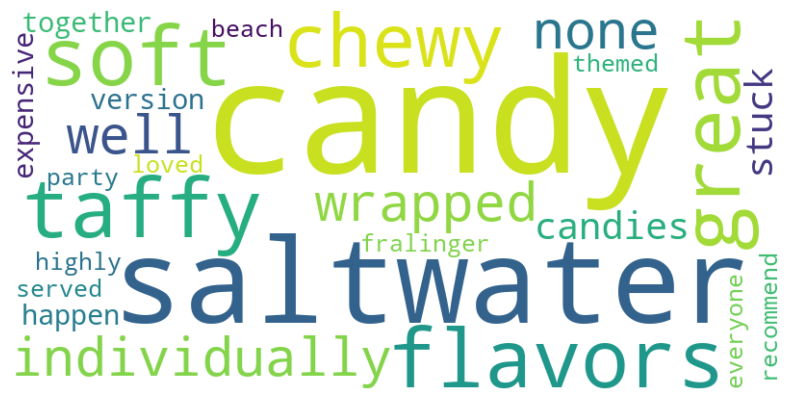

In [34]:
wordcloud=WordCloud(width=800, height=400, background_color='white').generate(doc)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')   # Hide axes
plt.show()

In [35]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [37]:
pos_tags = pos_tag(tokens)
print(pos_tags)

[('this', 'DT'), ('saltwater', 'NN'), ('taffy', 'NN'), ('had', 'VBD'), ('great', 'JJ'), ('flavors', 'NNS'), ('and', 'CC'), ('was', 'VBD'), ('very', 'RB'), ('soft', 'JJ'), ('and', 'CC'), ('chewy', 'JJ'), ('.', '.'), ('each', 'DT'), ('candy', 'NN'), ('was', 'VBD'), ('individually', 'RB'), ('wrapped', 'VBN'), ('well', 'RB'), ('.', '.'), ('none', 'NN'), ('of', 'IN'), ('the', 'DT'), ('candies', 'NNS'), ('were', 'VBD'), ('stuck', 'VBN'), ('together', 'RB'), (',', ','), ('which', 'WDT'), ('did', 'VBD'), ('happen', 'VB'), ('in', 'IN'), ('the', 'DT'), ('expensive', 'JJ'), ('version', 'NN'), (',', ','), ('fralinger', 'NN'), ("'s", 'POS'), ('.', '.'), ('would', 'MD'), ('highly', 'RB'), ('recommend', 'VB'), ('this', 'DT'), ('candy', 'NN'), ('!', '.'), ('i', 'NN'), ('served', 'VBD'), ('it', 'PRP'), ('at', 'IN'), ('a', 'DT'), ('beach-themed', 'JJ'), ('party', 'NN'), ('and', 'CC'), ('everyone', 'NN'), ('loved', 'VBD'), ('it', 'PRP'), ('!', '.')]


In [38]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
stop_words = set(stopwords.words('english'))
print(stop_words)


{'but', "it'd", 'against', "you'd", 'where', 'in', 'here', "she's", 'how', "they'll", "mightn't", 'off', 'once', 'ours', 's', 'were', 'more', 'most', "we'd", 'been', "shan't", 'does', 'yourselves', 'y', 'that', "he's", 'itself', "doesn't", 'with', 'did', "should've", 'and', 'you', 'haven', "shouldn't", 'shan', 'being', 'yourself', 'do', 'further', "hadn't", 're', 'themselves', 'when', "don't", 'those', 'until', "aren't", "they're", 'as', "we're", 'wasn', 'myself', 'herself', 'm', 'him', 'o', "they'd", 'too', "you'll", "haven't", 'why', 'their', "won't", "wasn't", 'just', 'couldn', 'about', 'his', 'having', 'i', 'mightn', 'same', "needn't", 'hers', "he'd", 'have', 'which', 'own', 'other', 'nor', 'yours', 'are', 'aren', 've', 'because', 'than', 'will', 'at', 'doesn', 'each', "i'm", 'theirs', 'all', 'should', "mustn't", "couldn't", "we've", 'so', 'not', 'won', 'ain', 'the', "she'd", 'doing', 'll', 'me', 'now', 'few', 'needn', 'some', 'd', 'didn', "you've", 'your', 'or', "she'll", 'don', '

In [41]:
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print(filtered_tokens)


['saltwater', 'taffy', 'great', 'flavors', 'soft', 'chewy', '.', 'candy', 'individually', 'wrapped', 'well', '.', 'none', 'candies', 'stuck', 'together', ',', 'happen', 'expensive', 'version', ',', 'fralinger', "'s", '.', 'would', 'highly', 'recommend', 'candy', '!', 'served', 'beach-themed', 'party', 'everyone', 'loved', '!']


In [42]:
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
print(stemmed_tokens)


['saltwat', 'taffi', 'great', 'flavor', 'soft', 'chewi', '.', 'candi', 'individu', 'wrap', 'well', '.', 'none', 'candi', 'stuck', 'togeth', ',', 'happen', 'expens', 'version', ',', 'fraling', "'s", '.', 'would', 'highli', 'recommend', 'candi', '!', 'serv', 'beach-them', 'parti', 'everyon', 'love', '!']


In [43]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print(lemmatized_tokens)


['saltwater', 'taffy', 'great', 'flavor', 'soft', 'chewy', '.', 'candy', 'individually', 'wrapped', 'well', '.', 'none', 'candy', 'stuck', 'together', ',', 'happen', 'expensive', 'version', ',', 'fralinger', "'s", '.', 'would', 'highly', 'recommend', 'candy', '!', 'served', 'beach-themed', 'party', 'everyone', 'loved', '!']


In [44]:
# Step 2: TF-IDF Calculation
# Corpus with one document 
corpus = [doc]
corpus

["this saltwater taffy had great flavors and was very soft and chewy.  each candy was individually wrapped well.  none of the candies were stuck together, which did happen in the expensive version, fralinger's.  would highly recommend this candy!  i served it at a beach-themed party and everyone loved it!"]

In [45]:
# Creating the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
vectorizer

TfidfVectorizer()

In [46]:
# Fit and transform the document into TF-IDF values
tfidf_matrix = vectorizer.fit_transform(corpus)
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 41 stored elements and shape (1, 41)>

In [47]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['and', 'at', 'beach', 'candies', 'candy', 'chewy', 'did', 'each',
       'everyone', 'expensive', 'flavors', 'fralinger', 'great', 'had',
       'happen', 'highly', 'in', 'individually', 'it', 'loved', 'none',
       'of', 'party', 'recommend', 'saltwater', 'served', 'soft', 'stuck',
       'taffy', 'the', 'themed', 'this', 'together', 'version', 'very',
       'was', 'well', 'were', 'which', 'would', 'wrapped'], dtype=object)

In [49]:
tfidf_scores = zip(feature_names, tfidf_matrix.toarray()[0])
print("\nTF-IDF Scores:")
for word, score in tfidf_scores:
    print(f"{word}: {score:.4f}")



TF-IDF Scores:
and: 0.3750
at: 0.1250
beach: 0.1250
candies: 0.1250
candy: 0.2500
chewy: 0.1250
did: 0.1250
each: 0.1250
everyone: 0.1250
expensive: 0.1250
flavors: 0.1250
fralinger: 0.1250
great: 0.1250
had: 0.1250
happen: 0.1250
highly: 0.1250
in: 0.1250
individually: 0.1250
it: 0.2500
loved: 0.1250
none: 0.1250
of: 0.1250
party: 0.1250
recommend: 0.1250
saltwater: 0.1250
served: 0.1250
soft: 0.1250
stuck: 0.1250
taffy: 0.1250
the: 0.2500
themed: 0.1250
this: 0.2500
together: 0.1250
version: 0.1250
very: 0.1250
was: 0.2500
well: 0.1250
were: 0.1250
which: 0.1250
would: 0.1250
wrapped: 0.1250


In [51]:
from collections import Counter

# Count occurrences of each POS tag
pos_counts = Counter([pos for _, pos in pos_tags])
# Display the frequency of each POS tag
print("POS Frequency:", pos_counts)

POS Frequency: Counter({'NN': 10, 'VBD': 7, 'DT': 6, 'JJ': 5, 'RB': 5, '.': 5, 'CC': 3, 'IN': 3, 'NNS': 2, 'VBN': 2, ',': 2, 'VB': 2, 'PRP': 2, 'WDT': 1, 'POS': 1, 'MD': 1})
